In [1]:
# standard imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import networkx as nx
from PIL import Image

import matplotlib.patches as mpatches
import plotly.express as px
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import datapane as dp

from nlp import * # custom nlp functions

print("import completed")

# number of pandas rows to display
pd.set_option('display.max_rows', 50)

import completed


In [2]:
metrics = ['euclidean', 'cosine', "cityblock"]

country_list = ['United States', 'England', 'Scotland', 'Australia', 'Canada', 'Ireland']

# data folder path
data_folder = './Data/'
path_ba = data_folder + 'BeerAdvocate/'
path_rb = data_folder + 'RateBeer/'
path_md = data_folder + 'matched_beer_data/'

# load the data files we need for this notebook
pickle_filename = "df_rb_reviews_filtered_beers_merged_users.pickle"
df_rb_reviews_filtered_beers_merged_users = pd.read_pickle(f"Data/{pickle_filename}")
pickle_filename = "df_ba_ratings_filtered_beers_merged_users.pickle"
df_ba_reviews_filtered_beers_merged_users = pd.read_pickle(f"Data/{pickle_filename}")

## Visualisations

Fig 1: Wordcloud

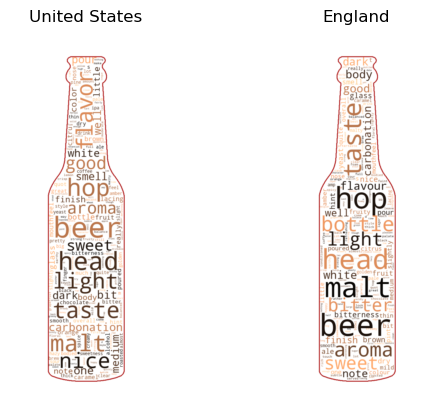

In [9]:
mask=np.array(Image.open("beer.png"))

fig, ax = plt.subplots(1, 2)

comp = ['United States', 'England']

for i in range(2):
    country = comp[i]
    df = df_ba_reviews_filtered_beers_merged_users[df_ba_reviews_filtered_beers_merged_users['user_country']==country] # get the reviews for the country //country was user_country
    df = df[df['text']!=""] # remove empty reviews
    df_text = df['text']
    text = ' '.join(df_text) # join all the reviews into one string (we only consider uni-grams)
    text = text.lower() # case folding

    # prep the wordcloud
    wordcloud = WordCloud(background_color="white", collocations=False, mask=mask, colormap="copper", contour_color="firebrick", contour_width=3, random_state=42).generate(text)

    # show the wordcloud
    ax[i].imshow(wordcloud, interpolation='bilinear')
    ax[i].axis("off")
    ax[i].set_title(country)
plt.savefig(r"C:\Users\andre\Documents\EPFL\MA3\Applied Data Analysis\2022\ada-2022-project-enchiladas\wordcloud.jpg", dpi=500)
plt.show()

<Figure size 640x480 with 0 Axes>

In [11]:
app = dp.App(
    dp.Page(title= "Wordcloud", blocks=["## Most Common Beer Related Words", dp.Media(file="./wordcloud.jpg", name="wordcloud")]),
    #dp.Page(title="Wordcloud", blocks=["# Wordcloud USA and England", dp.Plot(fig)]),
    dp.Page(title="Method", blocks=["## Method", dp.Text("change me")]),
)

app.save(path=r"C:\Users\andre\Documents\EPFL\MA3\Applied Data Analysis\2022\ada-2022-project-enchiladas\wordcloud.html")

App saved to ./C:\Users\andre\Documents\EPFL\MA3\Applied Data Analysis\2022\ada-2022-project-enchiladas\wordcloud.html

Fig 2: Dendrogram

C:\Users\andre\AppData\Local\Temp\ipykernel_10328\2939201675.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(dists, "single")


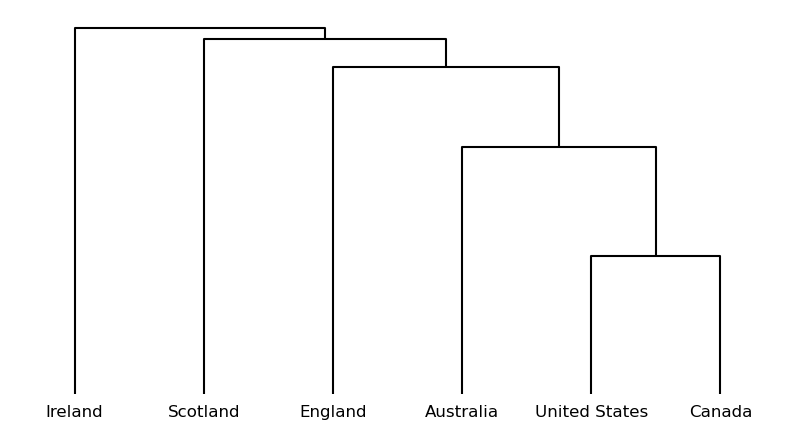

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))
dists = np.load('country/RAW_AVG_'+'euclidean'+'_dm.npy')
linkage_matrix = linkage(dists, "single")
dendrogram(linkage_matrix, labels=country_list, link_color_func=lambda k: 'black', color_threshold=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])
# plt.savefig("dendro.png", dpi=500)
plt.show()

In [11]:
app = dp.App(
    dp.Page(title="Dendrogram", blocks=["## Country Clustering", dp.Media(file="./dendro.png", name="dendo")]),
    # dp.Page(title="Dendogram", blocks=["# Choose appropriate title", dp.Plot(fig)]),
    dp.Page(title="Method", blocks=["## Method", dp.Text("change me")]),
)

app.save(path=r"C:\Users\andre\Documents\EPFL\MA3\Applied Data Analysis\2022\ada-2022-project-enchiladas\dendogram.html")

App saved to ./C:\Users\andre\Documents\EPFL\MA3\Applied Data Analysis\2022\ada-2022-project-enchiladas\dendogram.html

Fig 3: Interactive Scatterplots

In [24]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

us_state_to_region = {
    'Alabama': 'S',
    'Montana': 'W',
    'Alaska': 'W',
    'Nebraska': 'MW',
    'Arizona': 'W',
    'Nevada': 'W',
    'Arkansas': 'S',
    'New Hampshire': 'NE',
    'California': 'W',
    'New Jersey': 'NE',
    'Colorado': 'W',
    'New Mexico': 'W',
    'Connecticut': 'NE',
    'New York': 'NE',
    'Delaware': 'S',
    'North Carolina': 'S',
    'Florida': 'S',
    'North Dakota': 'MW',
    'Georgia': 'S',
    'Ohio': 'MW',
    'Hawaii': 'W',
    'Oklahoma': 'S',
    'Idaho': 'W',
    'Oregon': 'W',
    'Illinois': 'MW',
    'Pennsylvania': 'NE',
    'Indiana': 'MW',
    'Rhode Island': 'NE',
    'Iowa': 'MW',
    'South Carolina': 'S',
    'Kansas': 'MW',
    'South Dakota': 'MW',
    'Kentucky': 'S',
    'Tennessee': 'S',
    'Louisiana': 'S',
    'Texas': 'S',
    'Maine': 'NE',
    'Utah': 'W',
    'Maryland': 'S',
    'Vermont': 'NE',
    'Massachusetts': 'NE',
    'Virginia': 'S',
    'Michigan': 'MW',
    'Washington': 'W',
    'Minnesota': 'MW',
    'West Virginia': 'S',
    'Mississippi': 'S',
    'Wisconsin': 'MW',
    'Missouri': 'MW',
    'Wyoming': 'W',
   }

region_to_colour = {
    'W': 'yellow',
    'MW': 'lime',
    'S': 'cyan',
    'NE': 'red',
}

region_to_full_region = {
    'W': "West",
    'MW': "Middle West",
    "S": "South",
    "NE": "North East",
}

RateBeer

[[ 0.          6.88963027 11.84847783 ... 20.25465149 19.4083137
  38.41085423]
 [ 6.88963027  0.         10.52644995 ... 18.50476973 19.49186663
  36.83492873]
 [11.84847783 10.52644995  0.         ... 12.81487155 14.77735257
  31.50519772]
 ...
 [20.25465149 18.50476973 12.81487155 ...  0.         18.57112842
  30.64285519]
 [19.4083137  19.49186663 14.77735257 ... 18.57112842  0.
  31.11084568]
 [38.41085423 36.83492873 31.50519772 ... 30.64285519 31.11084568
   0.        ]]


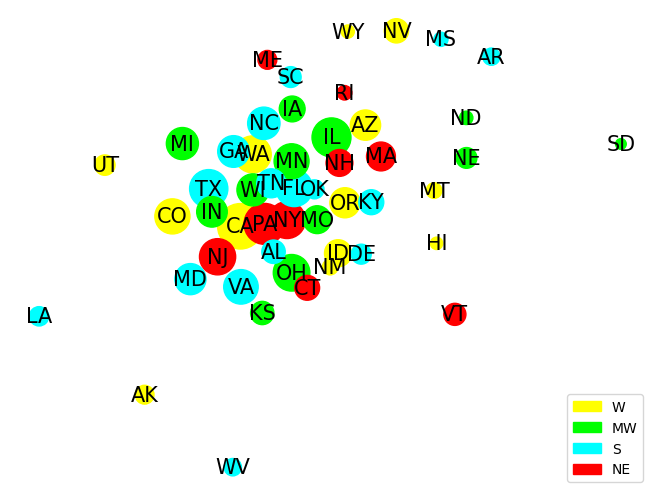

In [25]:
states = df_rb_reviews_filtered_beers_merged_users['user_state'].value_counts().index

dt = [('len', float)]
A = np.load('states_rb/RAW_AVG_'+'euclidean'+'_dm.npy')
A = A*10
print(A)
A = A.view(dt)

G = nx.from_numpy_matrix(A)
G = nx.relabel_nodes(G, dict(zip(range(len(G.nodes())), states)))    

G = nx.drawing.nx_agraph.to_agraph(G)

G.node_attr.update(color="red", area=0.2, fontsize=40)
G.edge_attr.update(color="red")

G.layout(prog='neato')
pos = {}
cmap = []
size = []
xs = []
ys = []
regs = []

scatter_df=pd.DataFrame()

for state in states:
    state_label=us_state_to_abbrev[state]
    pos[state_label] = np.array(G.get_node(state).attr['pos'].split(',')).astype('float')*100
    xs.append(pos[state_label][0])
    ys.append(pos[state_label][1])

    cmap.append(region_to_colour[us_state_to_region[state]])
    regs.append(us_state_to_region[state])

    size.append(np.sqrt(df_rb_reviews_filtered_beers_merged_users[df_rb_reviews_filtered_beers_merged_users['user_state']==state].count()[0])*5)

H=nx.Graph()

for state in states:
    H.add_node(us_state_to_abbrev[state])

nx.draw(H,pos,with_labels = True, node_color=cmap, node_size=size, font_size=15)

patches =[]
for i in range(len(region_to_colour.keys())):
    key = list(region_to_colour.keys())[i]
    val = region_to_colour[key]
    patches.append(mpatches.Patch(color=val, label=key))

plt.legend(handles=patches, loc='lower right')

plt.show()

In [28]:
scatter_df['size']=size
scatter_df['x']=xs
scatter_df['y']=ys
scatter_df['Region']=regs
scatter_df['Region'] = scatter_df["Region"].apply(lambda x: region_to_full_region.get(x))
scatter_df['#reviews'] = (scatter_df['size']/5)**2	
scatter_df['#reviews'] = scatter_df['#reviews'].astype(int)
scatter_df['label'] = list(map(lambda x: us_state_to_abbrev[x], states))
scatter_df['full_name'] = states

fig_rb = px.scatter(scatter_df, x="x", y="y", color="Region",
                 size='size', hover_data=['full_name', '#reviews'], text="label")
fig_rb.update_xaxes(visible=False, showticklabels=False)
fig_rb.update_yaxes(visible=False, showticklabels=False)
fig_rb.show()

BeerAdvocate

[[ 0.          3.92589823  3.08315055 ... 14.23695218 16.16464196
  11.07472989]
 [ 3.92589823  0.          3.48206945 ... 13.28677142 15.24281526
  11.49127627]
 [ 3.08315055  3.48206945  0.         ... 14.26845456 16.66133659
  11.05188398]
 ...
 [14.23695218 13.28677142 14.26845456 ...  0.         14.36379901
  19.42666444]
 [16.16464196 15.24281526 16.66133659 ... 14.36379901  0.
  22.71930688]
 [11.07472989 11.49127627 11.05188398 ... 19.42666444 22.71930688
   0.        ]]


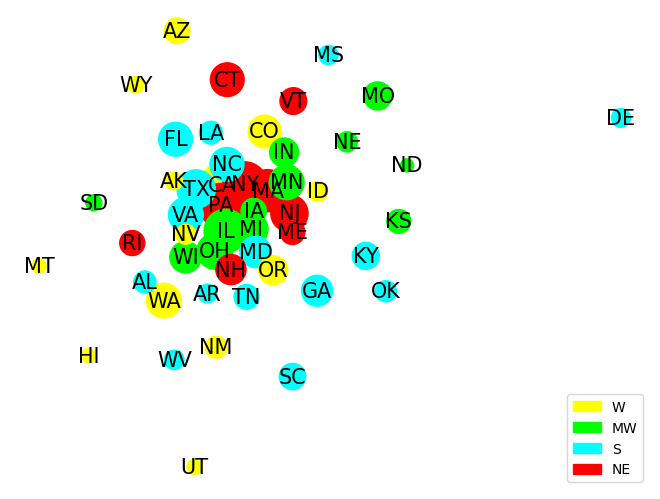

In [29]:
states = df_ba_reviews_filtered_beers_merged_users['user_state'].value_counts().index

dt = [('len', float)]
A = np.load('states_ba/RAW_AVG_'+'euclidean'+'_dm.npy')
A = A*10
print(A)
A = A.view(dt)

G = nx.from_numpy_matrix(A)
G = nx.relabel_nodes(G, dict(zip(range(len(G.nodes())), states)))    

G = nx.drawing.nx_agraph.to_agraph(G)

G.node_attr.update(color="red", area=0.2, fontsize=40)
G.edge_attr.update(color="red")

G.layout(prog='neato')
pos = {}
cmap = []
size = []
xs = []
ys = []
regs = []

scatter_df=pd.DataFrame()

for state in states:
    state_label=us_state_to_abbrev[state]
    pos[state_label] = np.array(G.get_node(state).attr['pos'].split(',')).astype('float')*100
    xs.append(pos[state_label][0])
    ys.append(pos[state_label][1])

    cmap.append(region_to_colour[us_state_to_region[state]])
    regs.append(us_state_to_region[state])

    size.append(np.sqrt(df_ba_reviews_filtered_beers_merged_users[df_ba_reviews_filtered_beers_merged_users['user_state']==state].count()[0])*5)

H=nx.Graph()

for state in states:
    H.add_node(us_state_to_abbrev[state])

nx.draw(H,pos,with_labels = True, node_color=cmap, node_size=size, font_size=15)

patches =[]
for i in range(len(region_to_colour.keys())):
    key = list(region_to_colour.keys())[i]
    val = region_to_colour[key]
    patches.append(mpatches.Patch(color=val, label=key))

plt.legend(handles=patches, loc='lower right')

plt.show()

In [30]:
scatter_df['size']=size
scatter_df['x']=xs
scatter_df['y']=ys
scatter_df['Region']=regs
scatter_df['#reviews'] = (scatter_df['size']/5)**2	
scatter_df['#reviews'] = scatter_df['#reviews'].astype(int)
scatter_df['label'] = list(map(lambda x: us_state_to_abbrev[x], states))
scatter_df['full_name'] = states
fig_ba = px.scatter(scatter_df, x="x", y="y", color="Region",
                 size='size', hover_data=['full_name', '#reviews'], text="label")
fig_ba.update_xaxes(visible=False, showticklabels=False)
fig_ba.update_yaxes(visible=False, showticklabels=False)
fig_ba.show()

In [31]:
app = dp.App(
    dp.Page(title="RateBeer", blocks=["## Language Similarity Between States", dp.Plot(fig_rb)]),
    dp.Page(title="BeerAdvocate", blocks=["## Language Similarity Between States", dp.Plot(fig_ba)]),
    dp.Page(title="Method", blocks=["## ", dp.Text("change me")]),
)

app.save(path=r"C:\Users\andre\Documents\EPFL\MA3\Applied Data Analysis\2022\ada-2022-project-enchiladas\network.html")

App saved to ./C:\Users\andre\Documents\EPFL\MA3\Applied Data Analysis\2022\ada-2022-project-enchiladas\network.html